In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///./Resources/hawaii.sqlite", echo=False)
inspector = inspect(engine)
tables = inspector.get_table_names()

In [3]:
for table in tables:
    print("=========")
    print(table)
    print("-----")
    columns = inspector.get_columns(table)
    for c in columns:
        print(c['name'], c["type"])

measurement
-----
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
station
-----
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [4]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [5]:
timestamp = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
timestamp

('2017-08-23')

In [6]:
most_recent = datetime.datetime.strptime(timestamp[0],'%Y-%m-%d')
year_previous = most_recent - datetime.timedelta(365)
date = year_previous.strftime('%Y-%m-%d')
date

'2016-08-23'

In [7]:
precip_data = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= date).\
                    order_by(Measurement.date).\
                    all()
precip_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [10]:
precip_df = pd.DataFrame(precip_data)
precip_df.rename(columns={'prcp':'precipitation'}, inplace=True)
precip_df.set_index('date')

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


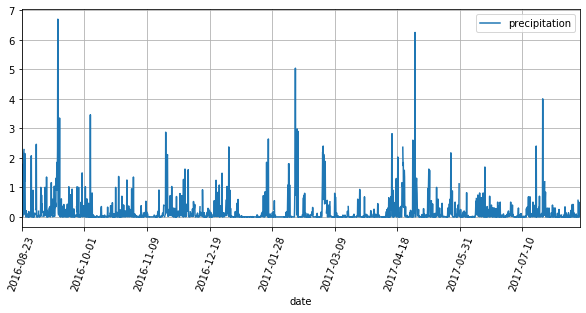

In [14]:
precip_plot = precip_df.plot(x='date', figsize=(10,4), grid=True, rot=70)
precip_plot

In [16]:
precip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
date             2230 non-null object
precipitation    2021 non-null float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB
